<a href="https://colab.research.google.com/github/rjain-22/r_jain/blob/main/dsci352hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train images: (60000, 28, 28)
Train labels: (60000,)
Test images : (10000, 28, 28)
Test labels : (10000,)


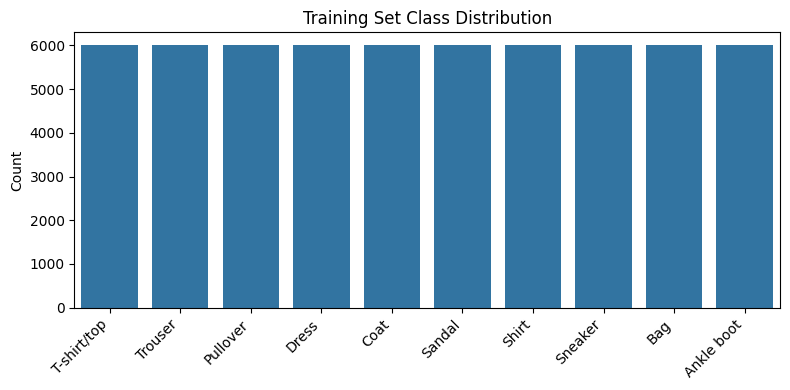

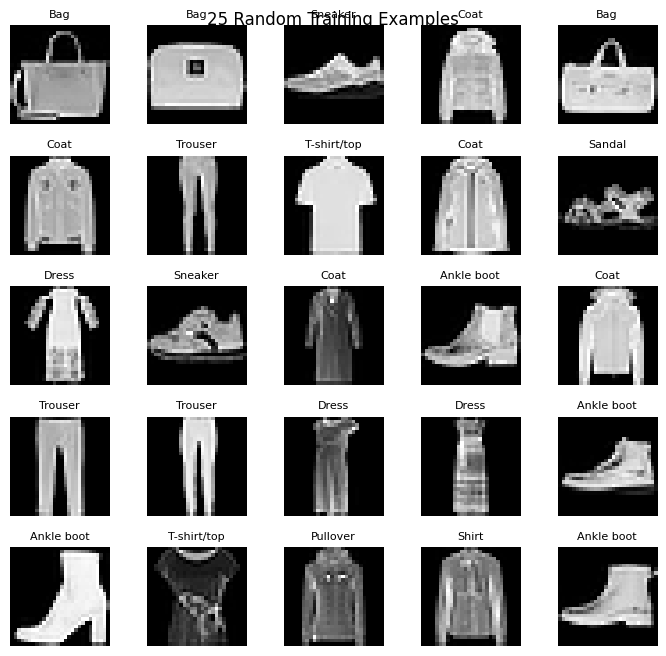

Scaled ranges — X_train:[ 0.0 , 1.0 ]  X_test:[ 0.0 , 1.0 ]


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
422/422 - 3s - 8ms/step - accuracy: 0.6694 - loss: 1.1074 - val_accuracy: 0.7530 - val_loss: 0.7270
Epoch 2/100
422/422 - 3s - 6ms/step - accuracy: 0.7761 - loss: 0.6655 - val_accuracy: 0.7952 - val_loss: 0.5977
Epoch 3/100
422/422 - 3s - 6ms/step - accuracy: 0.8081 - loss: 0.5745 - val_accuracy: 0.8180 - val_loss: 0.5386
Epoch 4/100
422/422 - 4s - 9ms/step - accuracy: 0.8228 - loss: 0.5266 - val_accuracy: 0.8250 - val_loss: 0.5041
Epoch 5/100
422/422 - 3s - 6ms/step - accuracy: 0.8308 - loss: 0.4967 - val_accuracy: 0.8317 - val_loss: 0.4812
Epoch 6/100
422/422 - 3s - 6ms/step - accuracy: 0.8362 - loss: 0.4756 - val_accuracy: 0.8342 - val_loss: 0.4643
Epoch 7/100
422/422 - 6s - 14ms/step - accuracy: 0.8412 - loss: 0.4596 - val_accuracy: 0.8407 - val_loss: 0.4512
Epoch 8/100
422/422 - 3s - 7ms/step - accuracy: 0.8453 - loss: 0.4467 - val_accuracy: 0.8450 - val_loss: 0.4403
Epoch 9/100
422/422 - 3s - 6ms/step - accuracy: 0.8488 - loss: 0.4359 - val_accuracy: 0.8477 - val_loss

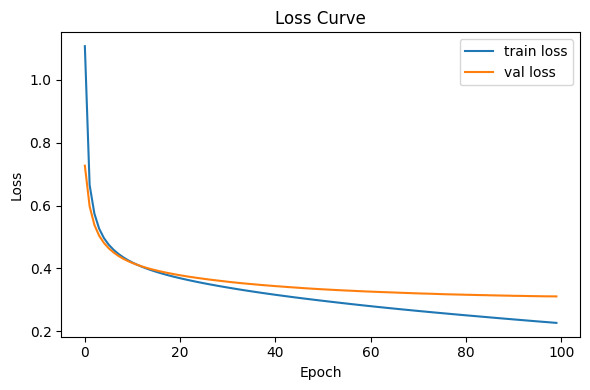

Test accuracy: 0.8808 | Test loss: 0.3372


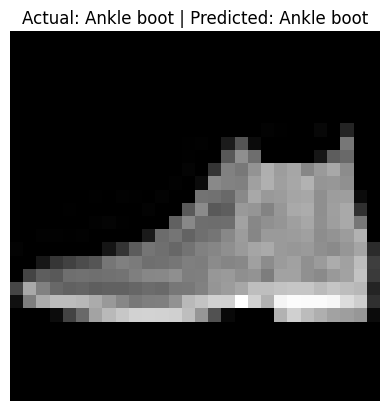

Probabilities for first test image:
T-shirt/top : 0.0000
Trouser     : 0.0000
Pullover    : 0.0000
Dress       : 0.0000
Coat        : 0.0000
Sandal      : 0.0166
Shirt       : 0.0000
Sneaker     : 0.0141
Bag         : 0.0003
Ankle boot  : 0.9690


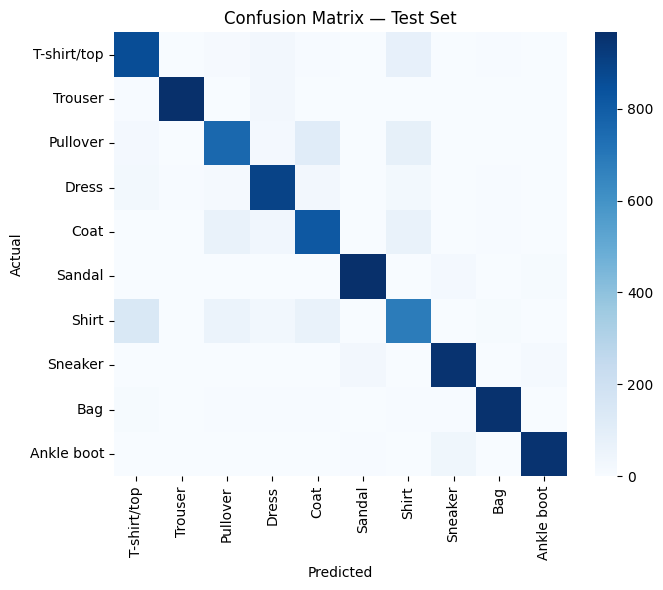

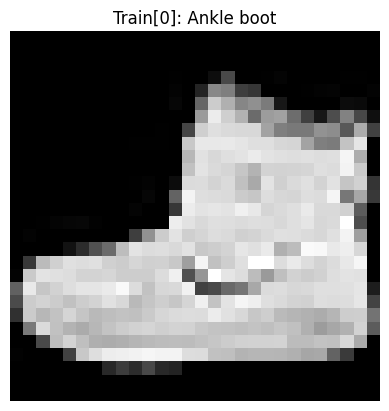

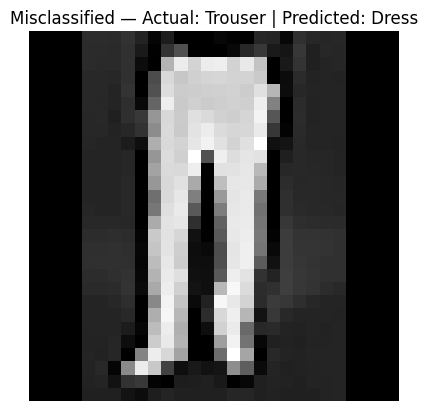

Index: 4678
Actual (num): 1 -> Trouser
Pred   (num): 3 -> Dress


In [1]:
# Rohan Jain
# DSCI Fall 2025
# Homework 5

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sb
import random
from sklearn.metrics import confusion_matrix

# Reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# Import train and test datasets:
fashion = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion.load_data()

print("Train images:", train_images.shape)
print("Train labels:", train_labels.shape)
print("Test images :", test_images.shape)
print("Test labels :", test_labels.shape)

# Define a dictionary:
# Target is integers 0..9, mapped to clothing names below
label_to_name = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}
name_to_label = {v: k for k, v in label_to_name.items()}

# Explore the distribution of apparel (label) in train:
train_counts = pd.Series(train_labels).value_counts().sort_index()
plt.figure(figsize=(8,4))
sb.barplot(x=[label_to_name[i] for i in train_counts.index], y=train_counts.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Count")
plt.title("Training Set Class Distribution")
plt.tight_layout()
plt.show()

# Display 25 clothing items:
idx = np.random.choice(len(train_images), size=25, replace=False)
plt.figure(figsize=(7,7))
for i, id_ in enumerate(idx, start=1):
    plt.subplot(5,5,i)
    plt.imshow(train_images[id_], cmap='gray')
    plt.title(label_to_name[int(train_labels[id_])], fontsize=8)
    plt.axis('off')
plt.suptitle("25 Random Training Examples", y=0.93)
plt.tight_layout()
plt.show()

# Scale train and test features:
X_train = (train_images.astype("float32") / 255.0)
X_test  = (test_images.astype("float32") / 255.0)
y_train = train_labels.astype("int64")
y_test  = test_labels.astype("int64")

print("Scaled ranges — X_train:[", X_train.min(), ",", X_train.max(), "]",
      " X_test:[", X_test.min(), ",", X_test.max(), "]")

# ===================
# keras sequential API:
# ===================
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # Output: 10 classes + softmax
])

# Show model summary:
model.summary()

# Set the loss function and the optimizer:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.0),
    metrics=['accuracy']
)

# Train the model:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)

# Plot the loss curve:
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f} | Test loss: {test_loss:.4f}")

# Predict:
# Predict first test example, show probabilities + label mapping
probs_first = model.predict(X_test[:1], verbose=0)[0]
pred_idx_first = int(np.argmax(probs_first))
actual_idx_first = int(y_test[0])

plt.figure()
plt.imshow(X_test[0], cmap='gray')
plt.title(f"Actual: {label_to_name[actual_idx_first]} | Predicted: {label_to_name[pred_idx_first]}")
plt.axis('off')
plt.show()

print("Probabilities for first test image:")
for i, p in enumerate(probs_first):
    print(f"{label_to_name[i]:<12}: {p:.4f}")

# Display confusion matrix:
y_pred = np.argmax(model.predict(X_test, batch_size=256, verbose=0), axis=1)
cm = confusion_matrix(y_test, y_pred, labels=list(range(10)))

plt.figure(figsize=(7,6))
sb.heatmap(cm, annot=False, fmt="d", cmap="Blues",
           xticklabels=[label_to_name[i] for i in range(10)],
           yticklabels=[label_to_name[i] for i in range(10)])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Test Set")
plt.tight_layout()
plt.show()

# We will now visualize the first row of the training dataset.
# This row represents one image which is one fashion item:
plt.figure()
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Train[0]: {label_to_name[int(y_train[0])]}")
plt.axis('off')
plt.show()

# We now print a random failed prediction:
# pick a random failed predict:
mis_idx = np.where(y_pred != y_test)[0]
if len(mis_idx) == 0:
    print("No misclassifications found.")
else:
    i = int(random.choice(mis_idx))
    plt.figure()
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Misclassified — Actual: {label_to_name[int(y_test[i])]} | "
              f"Predicted: {label_to_name[int(y_pred[i])]}")
    plt.axis('off')
    plt.show()

    print(f"Index: {i}")
    print(f"Actual (num): {int(y_test[i])} -> {label_to_name[int(y_test[i])]}")
    print(f"Pred   (num): {int(y_pred[i])} -> {label_to_name[int(y_pred[i])]}")
